In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


df = pd.read_parquet('/content/training.parquet')
df = df.sample(frac=0.1, random_state=42)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
5157331,1,2018-01-19 20:05:25,2018-01-19 20:11:11,1,0.80,1,N,164,246,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,NaN,NaN
5793000,1,2018-01-22 07:48:05,2018-01-22 07:59:59,1,2.70,1,N,87,79,1,11.0,0.0,0.5,2.35,0.0,0.3,14.15,NaN,NaN
7903933,1,2018-01-29 07:53:31,2018-01-29 08:05:12,1,1.10,1,N,100,233,1,9.0,0.0,0.5,1.95,0.0,0.3,11.75,NaN,NaN
684822,1,2018-01-03 19:12:43,2018-01-03 19:16:08,1,0.40,1,N,113,249,1,4.0,1.0,0.5,1.00,0.0,0.3,6.80,NaN,NaN
4873651,2,2018-01-18 22:18:37,2018-01-18 22:22:02,1,0.89,1,N,186,162,1,5.0,0.5,0.5,1.26,0.0,0.3,7.56,NaN,NaN


In [2]:
df.info() # to show general information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 876069 entries, 5157331 to 3490399
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               876069 non-null  int64         
 1   tpep_pickup_datetime   876069 non-null  datetime64[us]
 2   tpep_dropoff_datetime  876069 non-null  datetime64[us]
 3   passenger_count        876069 non-null  int64         
 4   trip_distance          876069 non-null  float64       
 5   RatecodeID             876069 non-null  int64         
 6   store_and_fwd_flag     876069 non-null  object        
 7   PULocationID           876069 non-null  int64         
 8   DOLocationID           876069 non-null  int64         
 9   payment_type           876069 non-null  int64         
 10  fare_amount            876069 non-null  float64       
 11  extra                  876069 non-null  float64       
 12  mta_tax                876069 non-null  fl

In [3]:
df.isna().sum() # to show the amount of null values

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [4]:
df.describe().T # to describe the shape of the data

,count,mean,min,25%,50%,75%,max,std
VendorID,876069.0,1.561183,1.0,1.0,2.0,2.0,2.0,0.496243
tpep_pickup_datetime,876069,2018-01-17 05:06:36.671150,2001-01-05 11:45:23,2018-01-09 23:13:53,2018-01-17 12:21:38,2018-01-24 20:17:14,2018-07-27 03:34:24,NaN
tpep_dropoff_datetime,876069,2018-01-17 05:22:17.439855,2001-01-05 11:52:05,2018-01-09 23:27:20,2018-01-17 12:36:34,2018-01-24 20:30:34,2018-07-27 03:46:39,NaN
passenger_count,876069.0,1.606463,0.0,1.0,1.0,2.0,9.0,1.257442
trip_distance,876069.0,2.786642,0.0,0.91,1.55,2.85,267.7,3.641216
RatecodeID,876069.0,1.039798,1.0,1.0,1.0,1.0,99.0,0.47329
PULocationID,876069.0,164.330666,1.0,114.0,162.0,234.0,265.0,66.365635
DOLocationID,876069.0,162.528003,1.0,113.0,162.0,234.0,265.0,70.313601
payment_type,876069.0,1.310823,1.0,1.0,1.0,2.0,4.0,0.481977
fare_amount,876069.0,12.254794,-450.0,6.0,9.0,13.5,1018.5,11.111477


In [5]:
df.drop(columns=['congestion_surcharge', 'airport_fee'], inplace=True) # drop for being unnecesery
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
5157331,1,2018-01-19 20:05:25,2018-01-19 20:11:11,1,0.80,1,N,164,246,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15
5793000,1,2018-01-22 07:48:05,2018-01-22 07:59:59,1,2.70,1,N,87,79,1,11.0,0.0,0.5,2.35,0.0,0.3,14.15
7903933,1,2018-01-29 07:53:31,2018-01-29 08:05:12,1,1.10,1,N,100,233,1,9.0,0.0,0.5,1.95,0.0,0.3,11.75
684822,1,2018-01-03 19:12:43,2018-01-03 19:16:08,1,0.40,1,N,113,249,1,4.0,1.0,0.5,1.00,0.0,0.3,6.80
4873651,2,2018-01-18 22:18:37,2018-01-18 22:22:02,1,0.89,1,N,186,162,1,5.0,0.5,0.5,1.26,0.0,0.3,7.56


In [6]:
df.store_and_fwd_flag.value_counts()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # for encoding on the same column without creating new column
df['store_and_fwd_flag'] = le.fit_transform(df['store_and_fwd_flag'])
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876069 entries, 5157331 to 3490399
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               876069 non-null  int64         
 1   tpep_pickup_datetime   876069 non-null  datetime64[us]
 2   tpep_dropoff_datetime  876069 non-null  datetime64[us]
 3   passenger_count        876069 non-null  int64         
 4   trip_distance          876069 non-null  float64       
 5   RatecodeID             876069 non-null  int64         
 6   store_and_fwd_flag     876069 non-null  category      
 7   PULocationID           876069 non-null  int64         
 8   DOLocationID           876069 non-null  int64         
 9   payment_type           876069 non-null  int64         
 10  fare_amount            876069 non-null  float64       
 11  extra                  876069 non-null  float64       
 12  mta_tax                876069 non-null  fl

In [7]:
q1 = df['trip_distance'].quantile(0.25)
q3 = df['trip_distance'].quantile(0.75) # 75% to calculate iqr
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df['trip_distance'] = df['trip_distance'].clip(lower, upper) # remove outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876069 entries, 5157331 to 3490399
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               876069 non-null  int64         
 1   tpep_pickup_datetime   876069 non-null  datetime64[us]
 2   tpep_dropoff_datetime  876069 non-null  datetime64[us]
 3   passenger_count        876069 non-null  int64         
 4   trip_distance          876069 non-null  float64       
 5   RatecodeID             876069 non-null  int64         
 6   store_and_fwd_flag     876069 non-null  category      
 7   PULocationID           876069 non-null  int64         
 8   DOLocationID           876069 non-null  int64         
 9   payment_type           876069 non-null  int64         
 10  fare_amount            876069 non-null  float64       
 11  extra                  876069 non-null  float64       
 12  mta_tax                876069 non-null  fl

In [8]:
df['fare_amount'] = np.log1p(df['fare_amount'])
df['total_amount'] = np.log1p(df['total_amount']) #transform to log
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876069 entries, 5157331 to 3490399
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               876069 non-null  int64         
 1   tpep_pickup_datetime   876069 non-null  datetime64[us]
 2   tpep_dropoff_datetime  876069 non-null  datetime64[us]
 3   passenger_count        876069 non-null  int64         
 4   trip_distance          876069 non-null  float64       
 5   RatecodeID             876069 non-null  int64         
 6   store_and_fwd_flag     876069 non-null  category      
 7   PULocationID           876069 non-null  int64         
 8   DOLocationID           876069 non-null  int64         
 9   payment_type           876069 non-null  int64         
 10  fare_amount            875641 non-null  float64       
 11  extra                  876069 non-null  float64       
 12  mta_tax                876069 non-null  fl

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
df['passenger_count'] = df['passenger_count'].clip(upper=6)

df['passenger_count'] = df['passenger_count'].apply(lambda x: x if x <= 6 else 'Other') # to categorize certain number and consider the rest as outliers
df['passenger_count'] = df['passenger_count'].astype('category')
df['passenger_count'] = le.fit_transform(df['passenger_count'])

df.passenger_count.value_counts()

,count
passenger_count,
1,624621
2,127475
5,41418
3,35221
6,24902
4,16406
0,6026


In [10]:
df['has_tip'] = (df['tip_amount'] > 0).astype(int)

df['tip_bin'] = pd.cut(df['tip_amount'], bins=[-1, 0, 5, 20, np.inf], labels=['None', 'Low', 'Med', 'High']) # for bining the data

df['tip_amount'] = np.log1p(df['tip_amount'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876069 entries, 5157331 to 3490399
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               876069 non-null  int64         
 1   tpep_pickup_datetime   876069 non-null  datetime64[us]
 2   tpep_dropoff_datetime  876069 non-null  datetime64[us]
 3   passenger_count        876069 non-null  int64         
 4   trip_distance          876069 non-null  float64       
 5   RatecodeID             876069 non-null  int64         
 6   store_and_fwd_flag     876069 non-null  category      
 7   PULocationID           876069 non-null  int64         
 8   DOLocationID           876069 non-null  int64         
 9   payment_type           876069 non-null  int64         
 10  fare_amount            875641 non-null  float64       
 11  extra                  876069 non-null  float64       
 12  mta_tax                876069 non-null  fl

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
df['has_toll'] = (df['tolls_amount'] > 0).astype(int) # for creating a new column with 1 or 0
df['tolls_amount'] = df['tolls_amount'].apply(lambda x: np.log1p(x) if x > 0 else 0) # transform to log
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876069 entries, 5157331 to 3490399
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               876069 non-null  int64         
 1   tpep_pickup_datetime   876069 non-null  datetime64[us]
 2   tpep_dropoff_datetime  876069 non-null  datetime64[us]
 3   passenger_count        876069 non-null  int64         
 4   trip_distance          876069 non-null  float64       
 5   RatecodeID             876069 non-null  int64         
 6   store_and_fwd_flag     876069 non-null  category      
 7   PULocationID           876069 non-null  int64         
 8   DOLocationID           876069 non-null  int64         
 9   payment_type           876069 non-null  int64         
 10  fare_amount            875641 non-null  float64       
 11  extra                  876069 non-null  float64       
 12  mta_tax                876069 non-null  fl

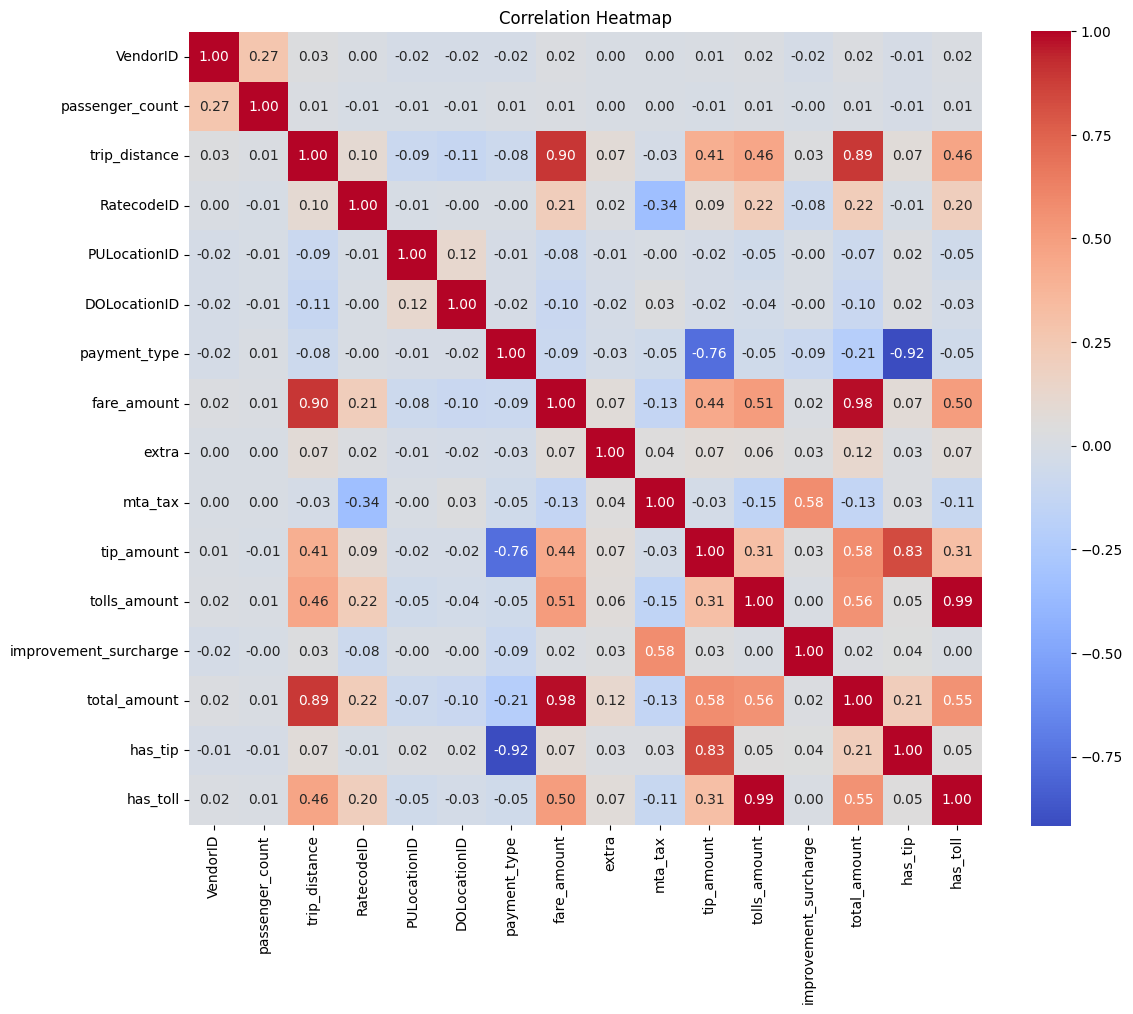

In [12]:
corr = df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'tip_bin', 'store_and_fwd_flag']).corr()# droping the categorical features

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [13]:
categorical_cols = ['VendorID', 'RatecodeID', 'passenger_count', 'has_tip', 'has_toll','store_and_fwd_flag','payment_type', 'tolls_amount', 'extra', 'mta_tax', 'improvement_surcharge']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

for col in categorical_cols:
    df[col] = df[col].astype('category') # to make sure that the columns are categorical


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876069 entries, 5157331 to 3490399
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               876069 non-null  category      
 1   tpep_pickup_datetime   876069 non-null  datetime64[us]
 2   tpep_dropoff_datetime  876069 non-null  datetime64[us]
 3   passenger_count        876069 non-null  category      
 4   trip_distance          876069 non-null  float64       
 5   RatecodeID             876069 non-null  category      
 6   store_and_fwd_flag     876069 non-null  category      
 7   PULocationID           876069 non-null  int64         
 8   DOLocationID           876069 non-null  int64         
 9   payment_type           876069 non-null  category      
 10  fare_amount            875641 non-null  float64       
 11  extra                  876069 non-null  category      
 12  mta_tax                876069 non-null  ca

In [14]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median()) # for filling the missing values of numeric columns
    else:
        df[col] = df[col].fillna(df[col].mode()[0]) # for filling the missing values of categorical columns


In [15]:
df.isna().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


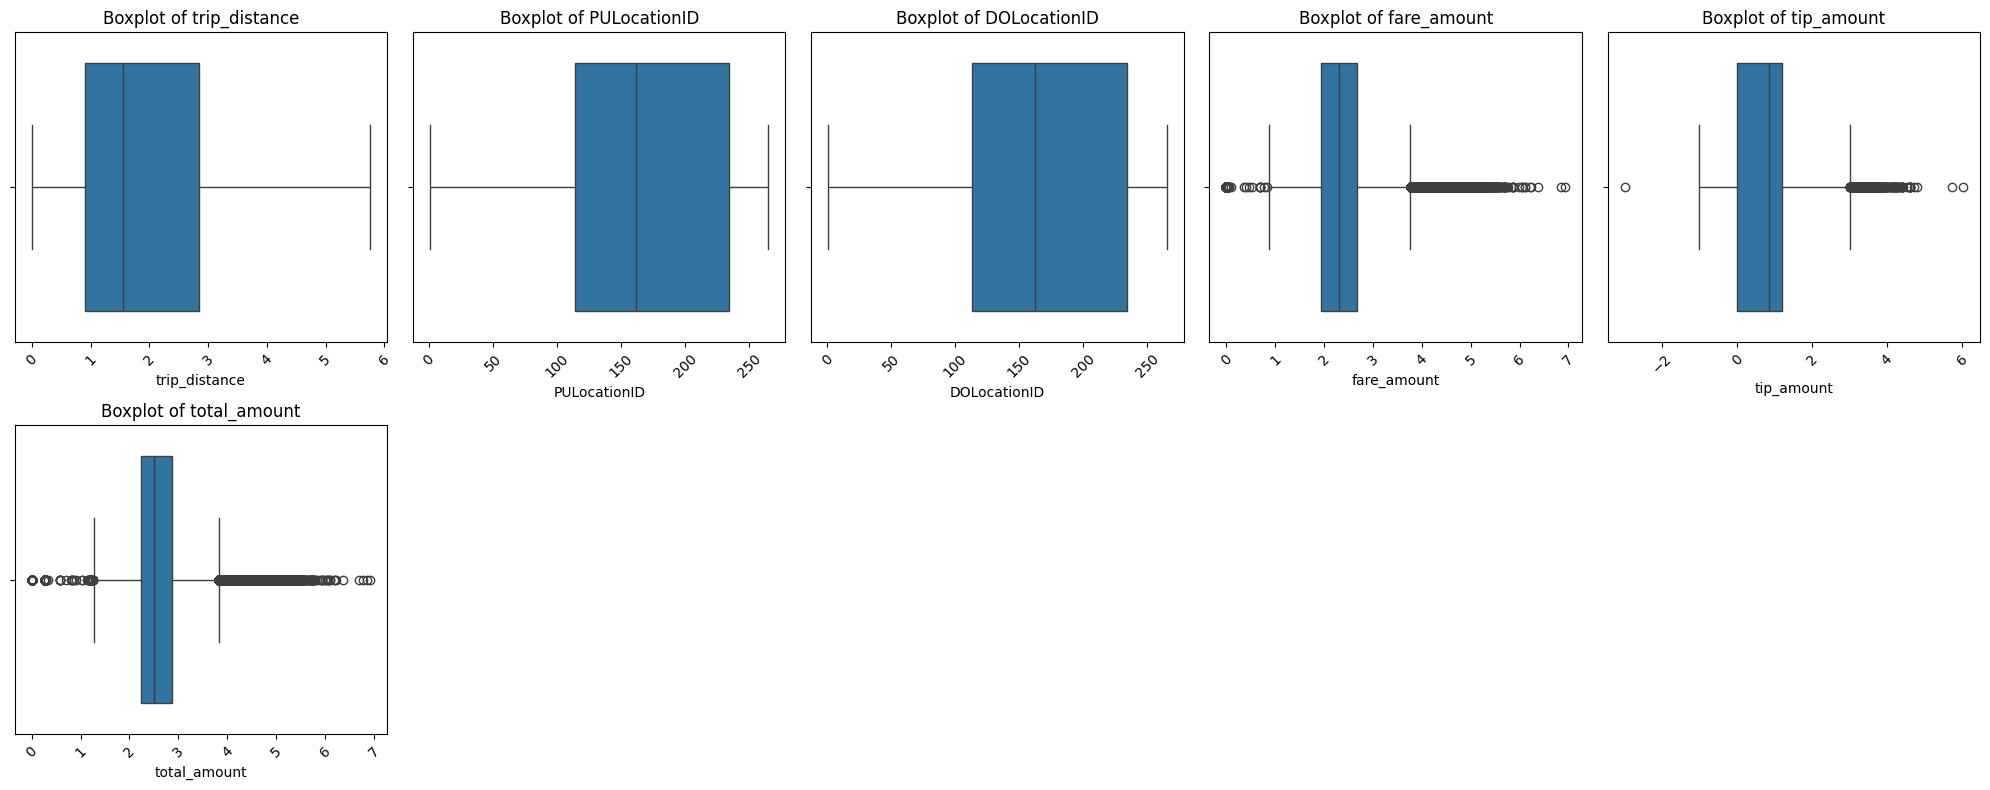

In [16]:
numeric_cols = df.select_dtypes(include='number')

cols_per_row = 5
num_plots = len(numeric_cols.columns)
num_rows = int(np.ceil(num_plots / cols_per_row))

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(20, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

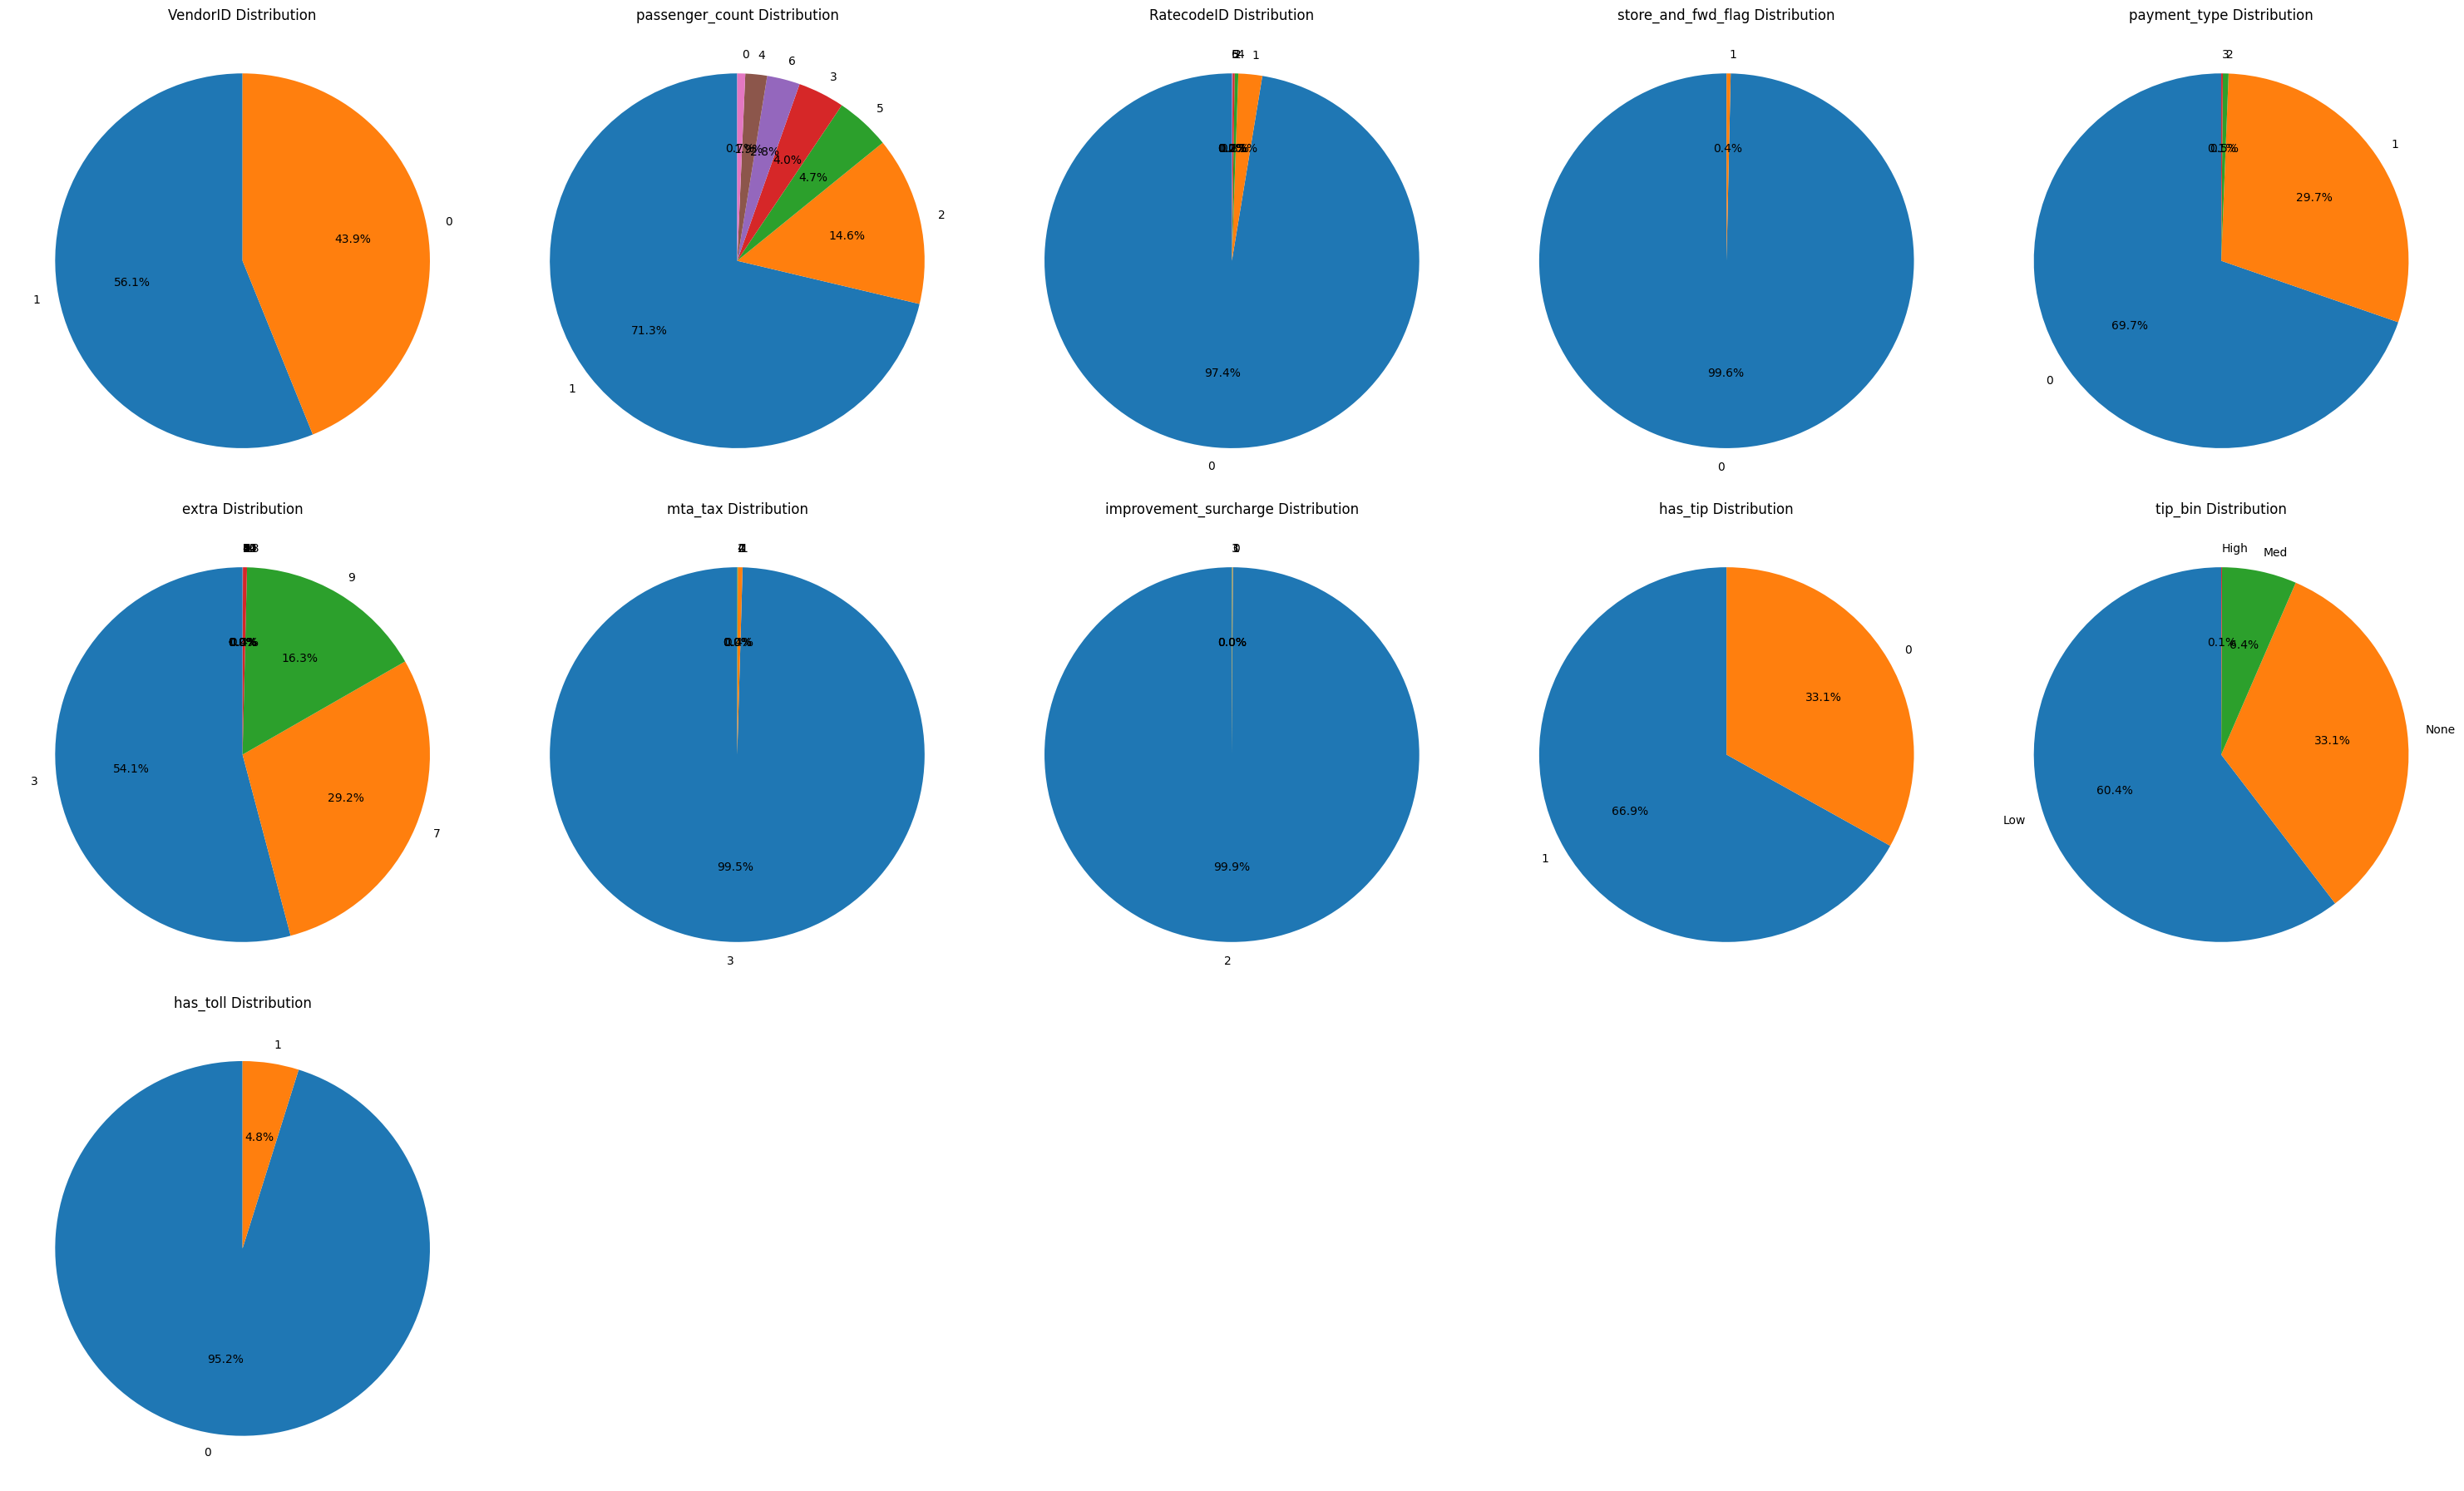

In [17]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

filtered_cols = [col for col in categorical_cols if df[col].nunique() <= 20]
num_plots = len(filtered_cols)

cols_per_row = 5
num_rows = int(np.ceil(num_plots / cols_per_row))

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(6 * cols_per_row, 6 * num_rows))
axes = axes.flatten()



for i, col in enumerate(filtered_cols):
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
def group_rare_categories(df, col, threshold=0.01):
    # Step 1: Calculate the frequency of each unique value (as a proportion of total)
    freq = df[col].value_counts(normalize=True)

    # Step 2: Identify categories that occur less than the threshold percentage (e.g., < 1%)
    rare = freq[freq < threshold].index

    # Step 3: Replace these rare categories with the label 'Other'
    df[col] = df[col].apply(lambda x: 'Other' if x in rare else x)
    return df

for col in ['RatecodeID', 'payment_type', 'passenger_count']:
    # Replace infrequent values in each of the listed columns with 'Other'
    df = group_rare_categories(df, col, threshold=0.01)


In [19]:
def iqr_cap(series):
    # Step 1: Calculate the 25th percentile (Q1) and 75th percentile (Q3)
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)

    # Step 2: Compute the Interquartile Range (IQR)
    iqr = q3 - q1

    # Step 3: Calculate lower and upper bounds for outlier detection
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Step 4: Clip values outside the bounds to the nearest bound (i.e., cap outliers)
    return series.clip(lower, upper)

# Apply IQR capping to selected numerical columns to reduce the impact of outliers
for col in ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']:
    df[col] = iqr_cap(df[col])

df.isna().sum()


,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


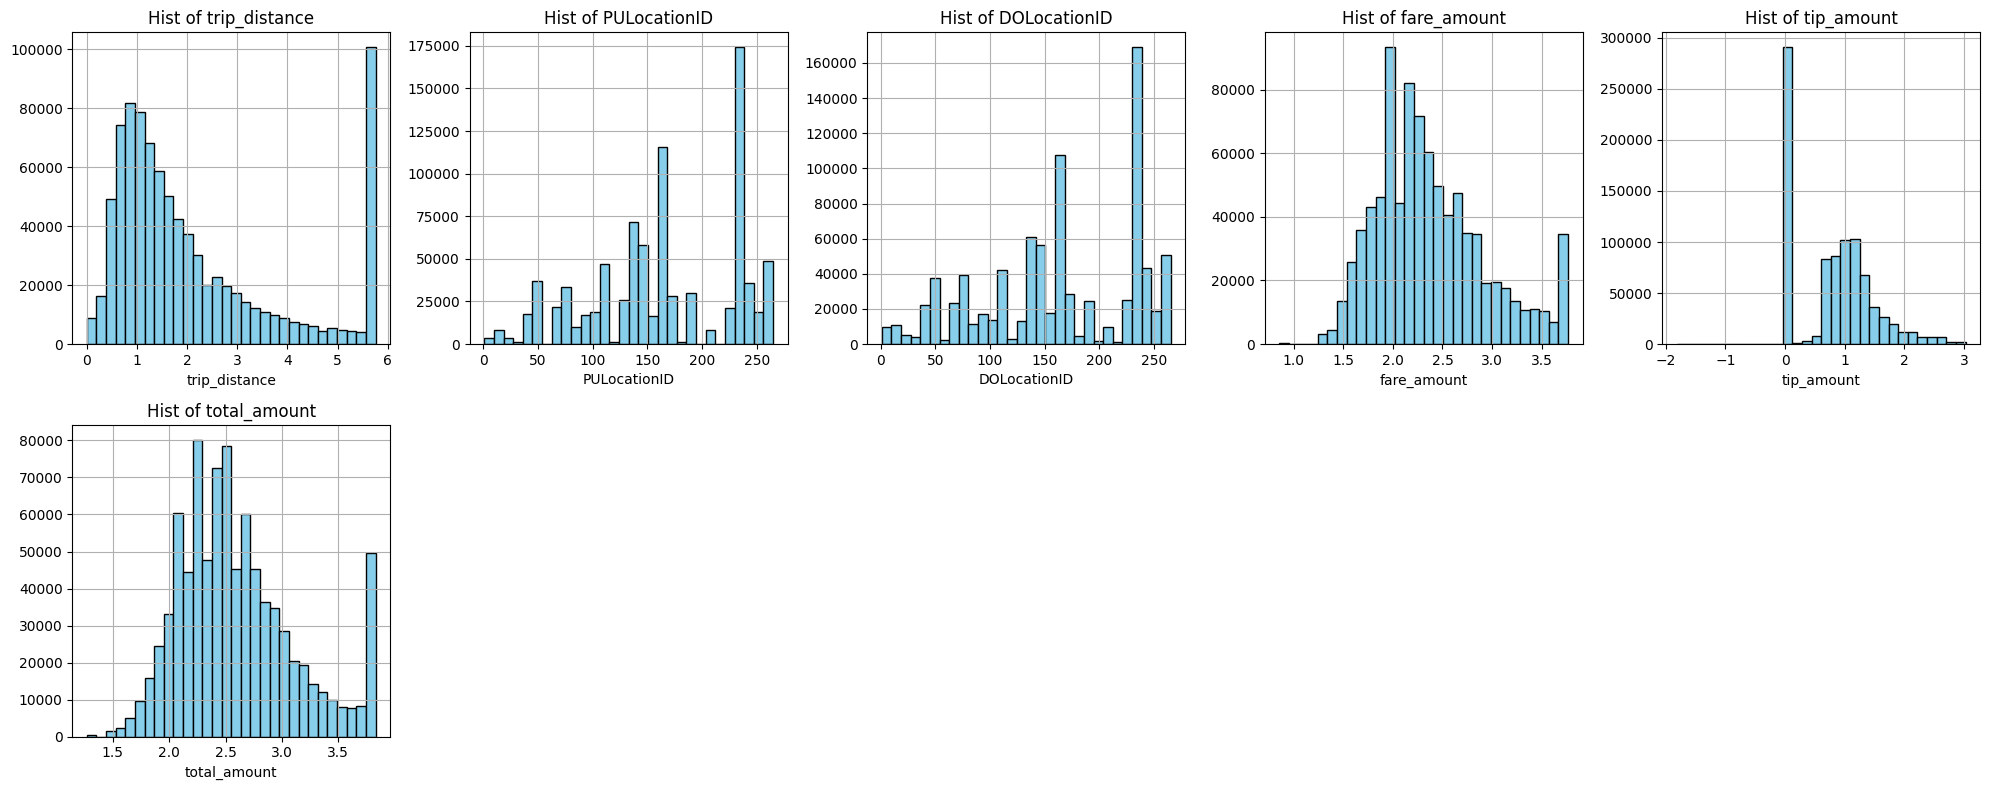

In [20]:
cols_per_row = 5
num_plots = len(numeric_cols.columns)
num_rows = int(np.ceil(num_plots / cols_per_row))

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(20, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Hist of {col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
X, y = df.drop(columns=['total_amount']), df['total_amount']

X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42 # for splitting the data into validation and test sets
)

In [22]:
numeric_cols = df.select_dtypes(include='number').columns


if 'total_amount' in numeric_cols:
    numeric_cols = numeric_cols.drop('total_amount')

scaler = StandardScaler()
X_train_full_scaled = pd.DataFrame(scaler.fit_transform(X_train_full[numeric_cols]), columns=numeric_cols)

X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_cols]), columns=numeric_cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), columns=numeric_cols)


In [23]:
model = LinearRegression()
cv_scores = cross_val_score(model, X_train_full_scaled, y_train_full, cv=5, scoring='neg_root_mean_squared_error')

print("Linear Regression CV RMSE scores:", -cv_scores)
print("Mean CV RMSE:", -np.mean(cv_scores))

Linear Regression CV RMSE scores: [0.06312329 0.06302455 0.06196415 0.06255672 0.06431036]
Mean CV RMSE: 0.062995813795276


In [24]:
tree = DecisionTreeRegressor(random_state=42)

tree_params = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
tree_grid.fit(X_train_full_scaled, y_train_full)

print("Best Decision Tree Parameters:", tree_grid.best_params_)
print("RMSE on Validation Set:", root_mean_squared_error(y_val, tree_grid.predict(X_val_scaled)))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Best Decision Tree Parameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
RMSE on Validation Set: 0.03345410379857645


In [25]:
rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': np.arange(50, 151),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['auto', 'sqrt']
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_full_scaled, y_train_full)
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", l

Best Parameters: {'n_estimators': np.int64(144), 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 20}


In [26]:
print("RMSE on Test Validation set:", root_mean_squared_error(y_val, random_search.predict(X_val_scaled)))


RMSE on Test Validation set: 0.03299633036253874


In [ ]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.1, gamma='scale')
# Fit the model to training data
svr.fit(X_train_full_scaled, y_train_full)
# Predict on validation set
y_pred = svr.predict(X_val_scaled)
# Calculate RMSE
rmse = root_mean_squared_error(y_val, y_pred)

print("SVR Parameters: kernel='rbf', C=1.0, epsilon=0.1, gamma='scale'")
print("RMSE on Validation Set:", rmse)

# svr = SVR()

# # Define parameter distributions (same as grid, but used randomly)
# svr_params = {
#     'kernel': ['rbf', 'linear', 'poly'],
#     'C': [0.1, 1, 10, 100],
#     'epsilon': [0.1, 0.2, 0.5],
#     'gamma': ['scale', 'auto']
# }

# svr_random = RandomizedSearchCV(
#     estimator=svr,
#     param_distributions=svr_params,
#     n_iter=10,  # Number of random combinations to try
#     cv=5,
#     scoring='neg_root_mean_squared_error',
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# svr_random.fit(X_train_full_scaled, y_train_full)

# print("Best SVR Parameters:", svr_random.best_params_)
# print("RMSE on Validation Set:", root_mean_squared_error(y_val, svr_random.predict(X_val_scaled)))
